# Heart failure prediction 
In this notebook you will be looking into the heart disease dataset presented here: <br>
https://www.kaggle.com/fedesoriano/heart-failure-prediction <br>
<br>
There are a lot of code snippets for you available. Pls be aware that some of the snippets need your attention to be completed (encoding). 
Additionally I added some questions that should help you explore the dataset. All these questions can be answered with the functions presented in the iris example. Feel free to explore the data beyond these questions. Pandas is widely used library, such that there is lot of information on additional functions e. g. on https://pandas.pydata.org/ or stackoverflow. The same is also true for sklearn. 

Questions:
1. What is the overall prevalence for heart disease? Compare it to the sample
2. What is the ratio of sexes in the sample?
3. How does the cholesterol level compare to the average population?
4. How often do exercise induced anginas occure in the sample?
5. How do the distributions for all variables look like?
6. Look at the correlation between age (cholosterol/blood pressure/heart rate) and and heart disease
7. Plot the histograms for all variables for female and male -> What are the difference?
8. Plot the histograms for all variables in three different age brackets -> What are the difference

At the end we would like to use a random forest model to predict the heart disease. Look at the confusion matrix for various hyperparameters. Could you imagine what implications could be on the choice of hyperparameters?

In [1]:
!pip install --upgrade pip
!pip install pandas
!pip install scikit-learn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = [15, 10]
pd.set_option('display.max_rows', None)

In [39]:
from IPython.display import Image
from IPython.display import display

In [3]:
df = pd.read_csv('data/heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
# get column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'sex_encoded', 'painType_encoded', 'ecg_encoded',
       'hr_encoded', 'slope_encoded', 'exAngina_encoded'],
      dtype='object')

In [13]:
# get all unique values in the selected column
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [92]:
#integer encoding
le = preprocessing.LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['Sex'].values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
df['painType_encoded'] = le.fit_transform(df['ChestPainType'].values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
df['ecg_encoded'] = le.fit_transform(df['RestingECG'].values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
# ExerciseAngina is still missing pls also transform it
# ST_Slope is still missing pls also transform it

{'F': 0, 'M': 1}
{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}
{'LVH': 0, 'Normal': 1, 'ST': 2}


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'FastingBS'}>],
       [<AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>,
        <AxesSubplot:title={'center':'HeartDisease'}>,
        <AxesSubplot:title={'center':'sex_encoded'}>],
       [<AxesSubplot:title={'center':'painType_encoded'}>,
        <AxesSubplot:title={'center':'ecg_encoded'}>,
        <AxesSubplot:title={'center':'hr_encoded'}>,
        <AxesSubplot:title={'center':'slope_encoded'}>],
       [<AxesSubplot:title={'center':'exAngina_encoded'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

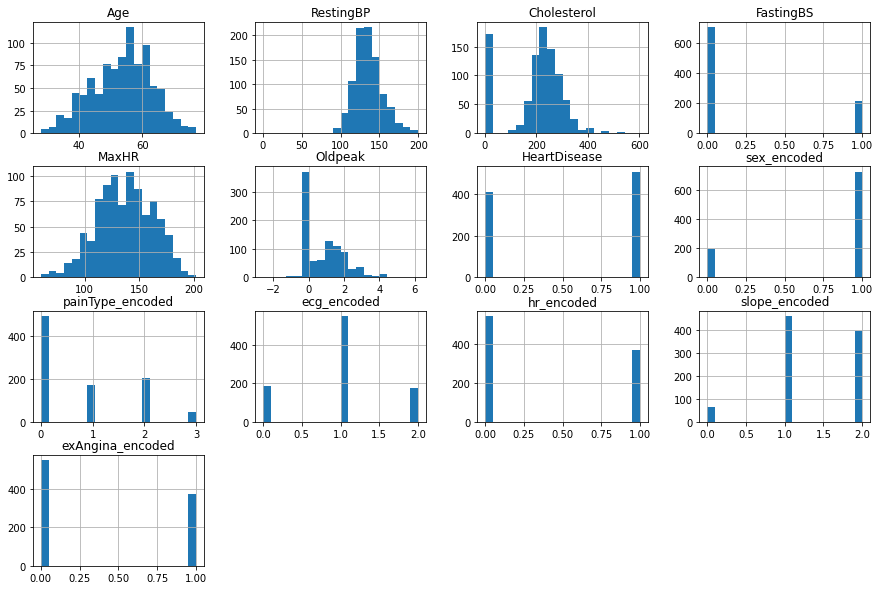

In [93]:
df.hist(bins=20)

<AxesSubplot:title={'center':'Age'}, xlabel='RestingECG'>

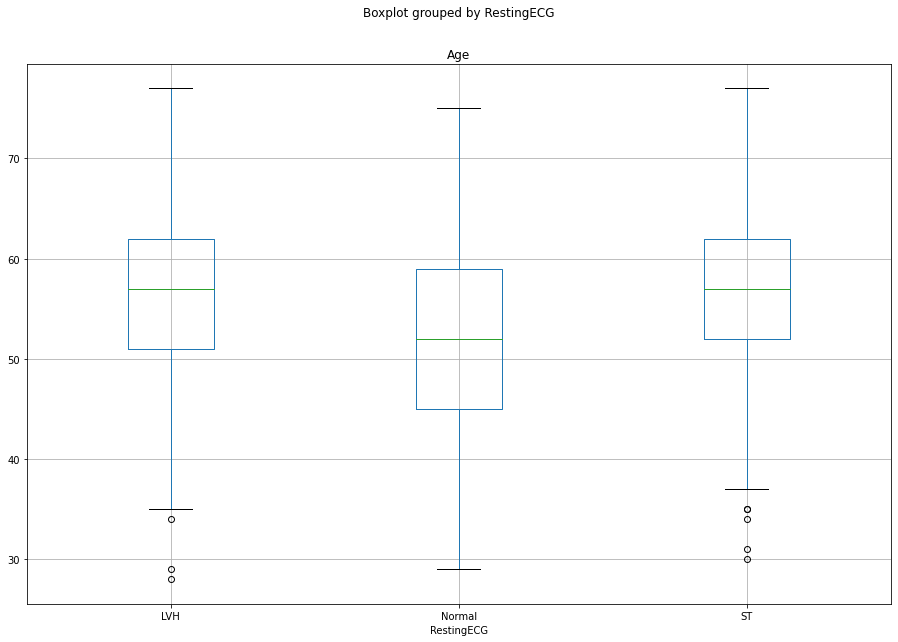

In [51]:
df.boxplot(column=['Age'], by='RestingECG') #, 'RestingBP', 'Cholesterol', 'MaxHR'])

In [90]:
male = df[df['Sex']=='M']

In [91]:
younger = df[df['Age'] < 45]

## Random Forest 

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [87]:
rnd_classifier = RandomForestClassifier(n_estimators=10, criterion='gini', 
                                        max_depth=None, max_features='auto', max_leaf_nodes=None, 
                                        min_impurity_decrease=0.0, bootstrap=True, 
                                        n_jobs=None, random_state=None, verbose=0)


In [65]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'sex_encoded', 'painType_encoded', 'ecg_encoded',
       'hr_encoded', 'slope_encoded', 'exAngina_encoded'],
      dtype='object')

# Don't train and test with the same data!
We will hopefully discuss in short with some handwaving arguments why to train and test on the same dataset is a bad ide